<h1><center>Deep Learning</center></h1>
<h2><center>Assignment # 2</center></h2>
<h3><center>Task # 2</center></h3>

In [ ]:
# Include libraries which may use in implementation
import numpy as np
import random
import sklearn.datasets as ds
import matplotlib.pyplot as plt
%matplotlib inline
import pickle


In [ ]:
# Create a Neural_Network class
class Neural_Network(object):        
    def __init__(self,inputSize = 2,hiddenlayer = 3,outputSize = 1, activation_function='sigmoid'):       
        # size of layers
        self.inputSize = inputSize
        self.outputSize = outputSize 
        self.hiddenLayer = hiddenlayer
        #weights
        self.W1 = np.random.rand(inputSize+1, hiddenlayer) # randomly initialize W1 using random function of numpy
        # size of the wieght will be (inputSize +1, hiddenlayer) that +1 is for bias    
        self.W2 = np.random.rand(hiddenlayer+1, outputSize) # randomly initialize W2 using random function of numpy
        # size of the wieght will be (hiddenlayer +1, outputSize) that +1 is for bias

        if activation_function == 'sigmoid':
            self.activation = self.sigmoid
            self.activationDerivative = self.sigmoid_derivative
        if activation_function == 'relu':
            self.activation = self.relu
            self.activationDerivative = self.reluDerivative
        if activation_function == 'tanh':
            self.activation = self.tanh
            self.activationDerivative = self.tanh_derivative     
        
    def one_to_x(self, X):
    # stack vector of 1 to X
        return np.hstack((np.ones((X.shape[0],1)),X)) # Stack arrays in sequence horizontally (column wise)

    def feedforward(self, X):
        #forward propagation through our network
        
        #Hidden Layer
        self.Z1 = np.dot(self.one_to_x(X), self.W1) # dot product of X (input) and set of weights    
        self.A1 = self.activation(self.Z1) # apply activation function (i.e. whatever function was passed in initialization)
        
        #Output Layer
        self.Z2 = np.dot(self.one_to_x(self.A1), self.W2)
        self.A2 = self.sigmoid(self.Z2)
        return self.A2 # return your answer with as a final output of the network
        

    def sigmoid(self, s):
        # activation function
        return 1/(1+np.exp(-s)) # apply sigmoid function on s and return it's value

    def sigmoid_derivative(self, s):
        #derivative of sigmoid
        return s*(1-s) # apply derivative of sigmoid on s and return it's value 
    
    def tanh(self, s):
        # activation function
        return np.tanh(s) # apply tanh function on s and return it's value

    def tanh_derivative(self, s):
        #derivative of tanh
        return 1-np.tanh(s)**2 # apply derivative of tanh on s and return it's value
    
    def relu(self, s):
        # activation function
        return np.maximum(0, s) # apply relu function on s and return it's value

    def reluDerivative(self, s):
        s[s<=0] = 0
        s[s>0] = 1
        return s

    def backwardpropagate(self,X, Y, y_pred, lr):
        # backward propagate through the network
        dcd_A2 = self.crossentropy_derivative(Y, y_pred)
        dA2_Z2 = self.sigmoid_derivative(y_pred) # compute error in output which is loss compute cross entropy loss function
        dcd_Z2 = dcd_A2*dA2_Z2

        d_W2 = np.dot(self.one_to_x(self.A1).T, dcd_Z2)
        
        d_A1 = np.dot(dcd_Z2, self.W2.T)
        d_A1 = d_A1[:,:-1]
        dcd_Z1 = d_A1*self.activationDerivative(self.Z1) # applying derivative of that applied activation function to the error
        d_W1 = np.dot(self.one_to_x(X).T, dcd_Z1)
        # adjust set of weights
        self.W1 = self.W1 -lr*d_W1
        self.W2 = self.W2 -lr*d_W2
    
    def crossentropy(self, Y, Y_pred):
        # compute error based on crossentropy loss 
        return (1/Y_pred.shape[0])*np.sum(-1*np.multiply(Y, np.log(Y_pred+ 1e-5)) - np.multiply((1-Y), np.log(1-Y_pred+ 1e-5))) #error

    def crossentropy_derivative(self, Y, Y_pred):
        #derivative of crossentropy
        return np.divide(Y_pred-Y, Y_pred*(1-Y_pred)) 

    def train(self, trainX, trainY,epochs = 100, learningRate = 0.001, plot_err = True ,validationX = None, validationY = None):
    
        valid_available = validationX is not None and validationY is not None
        trainY = trainY.reshape(trainY.shape[0], 1)
     
        if valid_available:
            validationY = validationY.reshape(validationY.shape[0], 1)
  
        # plot error of the model if plot_err is true
        validation_loss =[]  
        validation_accuracy =[]  
        training_loss = []
        training_accuracy = []

        # feed forward trainX and trainY and recivce predicted value
        for epoch in range(epochs):
          y_pred = self.feedforward(trainX)
          self.backwardpropagate(trainX, trainY, y_pred, learningRate)   # backpropagation with trainX, trainY, predicted value and learning rate.
          train_loss = self.crossentropy(y_pred,trainY)
          training_loss.append(train_loss)
          train_accuracy = self.accuracy(trainX, trainY)
          training_accuracy.append(train_accuracy)
          print('Epoch: {} -> training_loss:{:.4f}, Accuracy {:.4f}'.format(epoch, train_loss,train_accuracy))

          # if validationX and validationY are not null than show validation accuracy and error of the model by printing values.
          if validationX is not None and validationY is not None:
             val_pred = self.feedforward(validationX)
              # validation loss calculation
             val_loss = self.crossentropy(val_pred,validationY)
             val_accuracy = self.accuracy(validationX, validationY)
             validation_loss.append(val_loss)
             validation_accuracy.append(val_accuracy)
             print('Epoch: {} -> validation_loss:{:.4f}, Accuracy {:.4f}'.format(epoch, val_loss,val_accuracy))

        # plot error of the model if plot_err is true
        if plot_err:
          # loss curves
          plt.figure(figsize=(8,4))
          plt.title("Training and Validation Loss")
          plt.plot(validation_loss,label="val")
          plt.plot(training_loss,label="train")
          plt.xlabel("iterations")
          plt.ylabel("Loss")
          plt.legend()
          plt.show()

          # accuracy curves
          plt.figure(figsize=(8,4))
          plt.title("Training and Validation Accuracy")
          plt.plot(validation_accuracy,label="val")
          plt.plot(training_accuracy,label="train")
          plt.xlabel("iterations")
          plt.ylabel("Accuracy")
          plt.legend()
          plt.show() 

    def predict(self, testX):
        # predict the value of testX
        return self.feedforward(testX)
    
    def accuracy(self, testX, testY):
        
        testY = testY.reshape(testY.shape[0], -1)
        
        prediction = self.predict(testX)
        
        prediction[prediction>=0.5] = 1
        prediction[prediction<0.5] = 0
        accu = np.mean(prediction==testY)
        # predict the value of trainX
        # compare it with testY
        # compute accuracy, print it and show in the form of picture
        return accu # return accuracy 
        
    def save(self,name):
        # save your trained model, it is your interpretation how, which and what data you store
        # which you will use later for prediction
        with open(name, 'wb') as file:
            pickle.dump((self.W1, self.W2, self.activation, self.activationDerivative), file)
        
    def load(self,name):
        # load your trained model, load exactly how you stored it.
        with open(name, 'rb') as file:
            self.W1, self.W2, self.activation, self.activationDerivative = pickle.load(file)

    


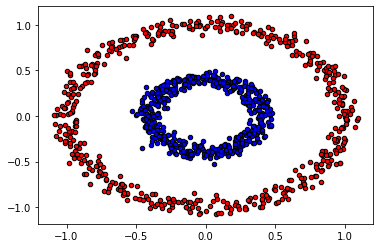

In [ ]:
data, label = ds.make_circles(n_samples=1000, factor=.4, noise=0.05)

#Lets visualize the dataset
reds = label == 0
blues = label == 1
plt.scatter(data[reds, 0], data[reds, 1], c="red", s=20, edgecolor='k')
plt.scatter(data[blues, 0], data[blues, 1], c="blue", s=20, edgecolor='k')
plt.show()


In [ ]:
import sklearn 
from sklearn.model_selection import train_test_split

#Note: shuffle this dataset before dividing it into three parts

random_seed= 42
indices = list(range(data.shape[0]))

np.random.seed(random_seed)
np.random.shuffle(indices)

# Distribute this data into three parts i.e. training, validation and testing

trainX, testX, trainY, testY = train_test_split(data, label, test_size=0.2) # split data into train and test
trainX, validX, trainY, validY = train_test_split(trainX, trainY, test_size=0.2) # split train data into validation and training


In [ ]:
model = Neural_Network(2, 5, 1, 'relu')
# try different combinations of epochs and learning rate
model.train(trainX, trainY, epochs = 100, learningRate = 0.005, validationX = validX, validationY = validY)

In [ ]:
#save the best model which you have trained, 
model.save('bestmodeltask2.mdl')

#### Note: This below section will be used for the evaluation of this task, we need your model and we will run script below to evaluated your model

In [ ]:
# create class object
mm = Neural_Network()
# load model which will be provided by you
mm.load('bestmodeltask2.mdl')
# check accuracy of that model
mm.accuracy(testX,testY)




1.0